In [1]:
import os

In [2]:
os.getcwd()

'C:\\Users\\HP\\python\\Revision Folder'

In [2]:
########################################################################
#
# Functions for downloading and extracting data-files from the internet.
#
# Implemented in Python 3.5
#
########################################################################
#
# This file is part of the TensorFlow Tutorials available at:
#
# https://github.com/Hvass-Labs/TensorFlow-Tutorials
#
# Published under the MIT License. See the file LICENSE for details.
#
# Copyright 2016 by Magnus Erik Hvass Pedersen
#
########################################################################

import sys
import os
import urllib.request
import tarfile
import zipfile

########################################################################


def _print_download_progress(count, block_size, total_size):
    """
    Function used for printing the download progress.
    Used as a call-back function in maybe_download_and_extract().
    """

    # Percentage completion.
    pct_complete = float(count * block_size) / total_size

    # Limit it because rounding errors may cause it to exceed 100%.
    pct_complete = min(1.0, pct_complete)

    # Status-message. Note the \r which means the line should overwrite itself.
    msg = "\r- Download progress: {0:.1%}".format(pct_complete)

    # Print it.
    sys.stdout.write(msg)
    sys.stdout.flush()


########################################################################

def download(base_url, filename, download_dir):
    """
    Download the given file if it does not already exist in the download_dir.
    :param base_url: The internet URL without the filename.
    :param filename: The filename that will be added to the base_url.
    :param download_dir: Local directory for storing the file.
    :return: Nothing.
    """

    # Path for local file.
    save_path = os.path.join(download_dir, filename)

    # Check if the file already exists, otherwise we need to download it now.
    if not os.path.exists(save_path):
        # Check if the download directory exists, otherwise create it.
        if not os.path.exists(download_dir):
            os.makedirs(download_dir)

        print("Downloading", filename, "...")

        # Download the file from the internet.
        url = base_url + filename
        file_path, _ = urllib.request.urlretrieve(url=url,
                                                  filename=save_path,
                                                  reporthook=_print_download_progress)

        print(" Done!")


def maybe_download_and_extract(url, download_dir):
    """
    Download and extract the data if it doesn't already exist.
    Assumes the url is a tar-ball file.
    :param url:
        Internet URL for the tar-file to download.
        Example: "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
    :param download_dir:
        Directory where the downloaded file is saved.
        Example: "data/CIFAR-10/"
    :return:
        Nothing.
    """

    # Filename for saving the file downloaded from the internet.
    # Use the filename from the URL and add it to the download_dir.
    filename = url.split('/')[-1]
    file_path = os.path.join(download_dir, filename)

    # Check if the file already exists.
    # If it exists then we assume it has also been extracted,
    # otherwise we need to download and extract it now.
    if not os.path.exists(file_path):
        # Check if the download directory exists, otherwise create it.
        if not os.path.exists(download_dir):
            os.makedirs(download_dir)

        # Download the file from the internet.
        file_path, _ = urllib.request.urlretrieve(url=url,
                                                  filename=file_path,
                                                  reporthook=_print_download_progress)

        print()
        print("Download finished. Extracting files.")

        if file_path.endswith(".zip"):
            # Unpack the zip-file.
            zipfile.ZipFile(file=file_path, mode="r").extractall(download_dir)
        elif file_path.endswith((".tar.gz", ".tgz")):
            # Unpack the tar-ball.
            tarfile.open(name=file_path, mode="r:gz").extractall(download_dir)

        print("Done.")
    else:
        print("Data has apparently already been downloaded and unpacked.")


########################################################################

In [3]:
data_dir = "data/IMDB/"

# URL for the data-set on the internet.
data_url = "http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

In [4]:
#downloading data
maybe_download_and_extract(data_url,data_dir)

- Download progress: 100.0%
Download finished. Extracting files.
Done.


In [9]:
########################################################################
#
# Functions for downloading the IMDB Review data-set from the internet
# and loading it into memory.
#
# Implemented in Python 3.6
#
# Usage:
# 1) Set the variable data_dir with the desired storage directory.
# 2) Call maybe_download_and_extract() to download the data-set
#    if it is not already located in the given data_dir.
# 3) Call load_data(train=True) to load the training-set.
# 4) Call load_data(train=False) to load the test-set.
# 5) Use the returned data in your own program.
#
# Format:
# The IMDB Review data-set consists of 50000 reviews of movies
# that are split into 25000 reviews for the training- and test-set,
# and each of those is split into 12500 positive and 12500 negative reviews.
# These are returned as lists of strings by the load_data() function.
#
########################################################################
#
# This file is part of the TensorFlow Tutorials available at:
#
# https://github.com/Hvass-Labs/TensorFlow-Tutorials
#
# Published under the MIT License. See the file LICENSE for details.
#
# Copyright 2018 by Magnus Erik Hvass Pedersen
#
########################################################################

import os
import download
import glob

########################################################################

# Directory where you want to download and save the data-set.
# Set this before you start calling any of the functions below.
data_dir = "data/IMDB/"

# URL for the data-set on the internet.
data_url = "http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"


########################################################################
# Private helper-functions.

def _read_text_file(path):
    """
    Read and return all the contents of the text-file with the given path.
    It is returned as a single string where all lines are concatenated.
    """

    with open(path, 'rt',encoding = 'latin1') as file:
        # Read a list of strings.
        lines = file.readlines()

        # Concatenate to a single string.
        text = " ".join(lines)

    return text


########################################################################
# Public functions that you may call to download the data-set from
# the internet and load the data into memory.


def maybe_download_and_extract():
    """
    Download and extract the IMDB Review data-set if it doesn't already exist
    in data_dir (set this variable first to the desired directory).
    """

    download.maybe_download_and_extract(url=data_url, download_dir=data_dir)


def load_data(train=True):
    """
    Load all the data from the IMDB Review data-set for sentiment analysis.
    :param train: Boolean whether to load the training-set (True)
                  or the test-set (False).
    :return:      A list of all the reviews as text-strings,
                  and a list of the corresponding sentiments
                  where 1.0 is positive and 0.0 is negative.
    """

    # Part of the path-name for either training or test-set.
    train_test_path = "train" if train else "test"

    # Base-directory where the extracted data is located.
    dir_base = os.path.join(data_dir, "aclImdb", train_test_path)

    # Filename-patterns for the data-files.
    path_pattern_pos = os.path.join(dir_base, "pos", "*.txt")
    path_pattern_neg = os.path.join(dir_base, "neg", "*.txt")

    # Get lists of all the file-paths for the data.
    paths_pos = glob.glob(path_pattern_pos)
    paths_neg = glob.glob(path_pattern_neg)

    # Read all the text-files.
    data_pos = [_read_text_file(path) for path in paths_pos]
    data_neg = [_read_text_file(path) for path in paths_neg]

    # Concatenate the positive and negative data.
    x = data_pos + data_neg

    # Create a list of the sentiments for the text-data.
    # 1.0 is a positive sentiment, 0.0 is a negative sentiment.
    y = [1.0] * len(data_pos) + [0.0] * len(data_neg)

    return x, y


########################################################################

In [10]:
#loading data
X_train_text,y_train = load_data(train = True)
X_test_text,y_test = load_data(train = False)
#list of sentences

In [11]:
type(X_train_text)

list

In [12]:
len(X_train_text)

25000

In [13]:
type(y_train)

list

In [14]:
len(y_train)

25000

In [15]:
X_train_text[:2]

['Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High\'s satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers\' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I\'m here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn\'t!',
 'Homelessness (or Houselessness as George Carlin stated) has been an issue for years but never a plan to help those on the street that were once considered human who did everything fro

In [16]:
y_train[:2]

[1.0, 1.0]

In [18]:
len(X_test_text)

25000

In [19]:
num_words = 10000

In [20]:
import keras

Using TensorFlow backend.


In [21]:
from keras.preprocessing.text import Tokenizer

In [22]:
tokenizer = Tokenizer(num_words = num_words)

In [23]:
data_text = X_train_text + X_test_text

In [24]:
#giving each word a number based on most frequent word
tokenizer.fit_on_texts(data_text)

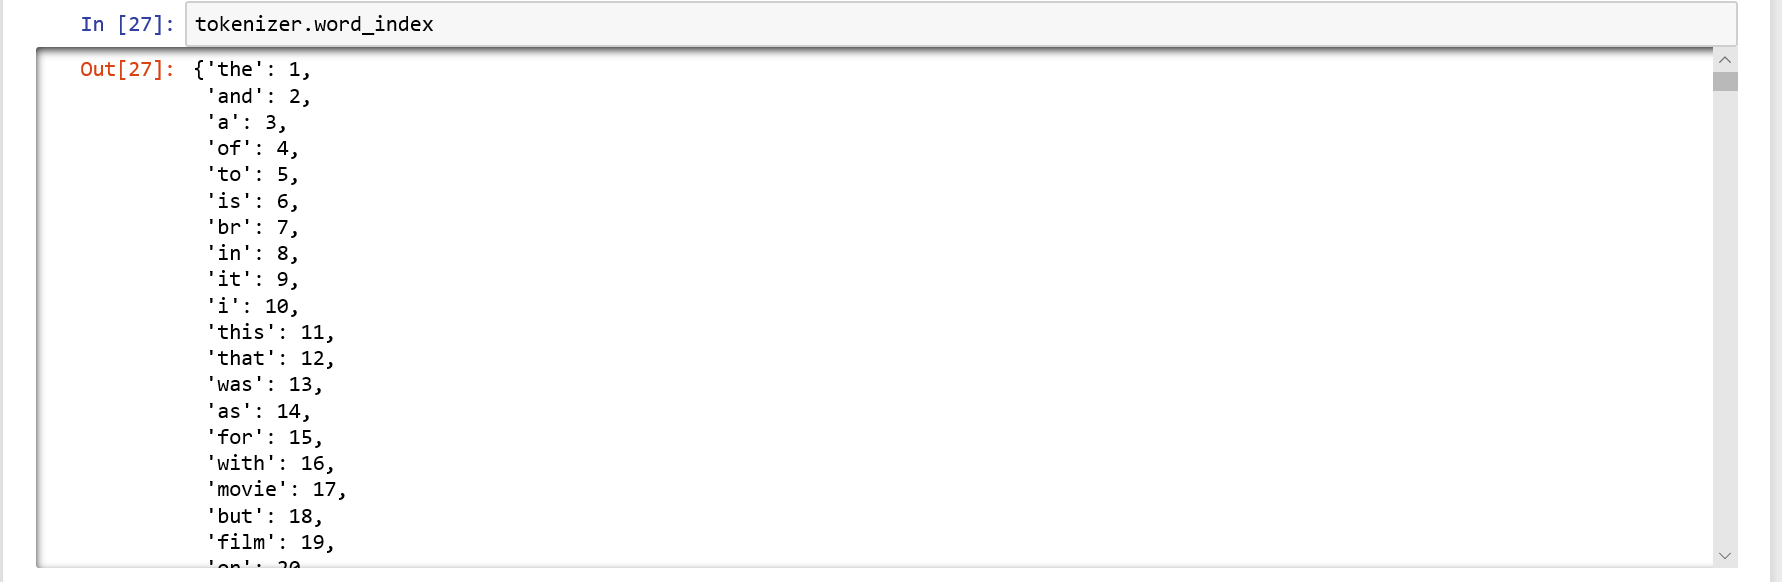

In [5]:
# Seeing words and their ids
Image("w.png")

In [28]:
X_train_tokens = tokenizer.texts_to_sequences(X_train_text)
#list of tokens within a list

In [29]:
X_test_tokens = tokenizer.texts_to_sequences(X_test_text)

In [35]:
X_train_text[0]

'Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High\'s satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers\' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I\'m here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn\'t!'

In [58]:
import numpy as np

In [57]:
np.array(X_train_tokens[:2])

array([list([299, 6, 3, 1059, 202, 9, 2119, 30, 1, 167, 55, 14, 47, 79, 6274, 42, 368, 114, 138, 14, 5103, 56, 4515, 153, 8, 1, 4233, 5799, 469, 68, 5, 262, 12, 2072, 6, 72, 2556, 5, 614, 71, 6, 5103, 1, 5, 1897, 1, 5540, 1469, 35, 67, 63, 203, 140, 65, 1151, 1, 4, 1, 223, 871, 29, 3195, 68, 4, 1, 5510, 10, 677, 2, 65, 1469, 50, 10, 210, 1, 398, 8, 60, 3, 1425, 3345, 762, 5, 3491, 175, 1, 368, 10, 1220, 30, 299, 3, 360, 347, 3471, 145, 133, 5, 8306, 27, 4, 125, 5103, 1425, 2563, 5, 299, 10, 525, 12, 106, 1540, 4, 56, 599, 101, 12, 299, 6, 225, 3994, 48, 3, 2244, 12, 9, 213]),
       list([38, 14, 744, 3506, 45, 75, 32, 1771, 15, 153, 18, 110, 3, 1344, 5, 343, 143, 20, 1, 920, 12, 70, 281, 1228, 395, 35, 115, 267, 36, 166, 5, 368, 158, 38, 2058, 15, 1, 504, 88, 83, 101, 4, 1, 4339, 14, 39, 3, 432, 1148, 136, 8697, 42, 177, 138, 14, 2791, 1, 295, 20, 5276, 351, 5, 3029, 2310, 1, 38, 8697, 43, 3611, 26, 365, 5, 127, 53, 20, 1, 2032, 7, 7, 18, 48, 43, 22, 70, 358, 3, 2343, 5, 420, 20, 1, 2

In [33]:
import numpy as np

In [36]:
np.array(X_train_tokens[0])

array([ 299,    6,    3, 1059,  202,    9, 2119,   30,    1,  167,   55,
         14,   47,   79, 6274,   42,  368,  114,  138,   14, 5103,   56,
       4515,  153,    8,    1, 4233, 5799,  469,   68,    5,  262,   12,
       2072,    6,   72, 2556,    5,  614,   71,    6, 5103,    1,    5,
       1897,    1, 5540, 1469,   35,   67,   63,  203,  140,   65, 1151,
          1,    4,    1,  223,  871,   29, 3195,   68,    4,    1, 5510,
         10,  677,    2,   65, 1469,   50,   10,  210,    1,  398,    8,
         60,    3, 1425, 3345,  762,    5, 3491,  175,    1,  368,   10,
       1220,   30,  299,    3,  360,  347, 3471,  145,  133,    5, 8306,
         27,    4,  125, 5103, 1425, 2563,    5,  299,   10,  525,   12,
        106, 1540,    4,   56,  599,  101,   12,  299,    6,  225, 3994,
         48,    3, 2244,   12,    9,  213])

In [37]:
#no.of tokens in each review of train and test
num_tokens = [len(tokens) for tokens in X_train_tokens + X_test_tokens]
num_tokens = np.array(num_tokens)

In [38]:
#average no.of tokens in each review of train and test
np.mean(num_tokens)

221.27714

In [39]:
#max no.of tokens in the whole dataset
np.max(num_tokens)

2209

In [40]:
max_tokens = np.mean(num_tokens) + 2*np.std(num_tokens)
max_tokens = int(max_tokens)
max_tokens

544

In [41]:
np.sum(num_tokens < max_tokens)/len(num_tokens)

0.9453

In [42]:
#So about 95% of the reviews are less than 544 tokens/words length.
#We are truncating(pre) other 5% to length of 544 tokens of both train and test whose length is greater
#than 544

In [45]:
from keras.preprocessing.sequence import pad_sequences

In [43]:
pad = 'pre'

In [50]:
X_train_pad = pad_sequences(X_train_tokens,maxlen = max_tokens,padding = pad,truncating = pad)
#2d array of tokens

In [47]:
X_test_pad = pad_sequences(X_test_tokens,maxlen = max_tokens,padding = pad,truncating = pad)

In [51]:
X_train_pad.shape

(25000, 544)

In [52]:
X_test_pad.shape

(25000, 544)

In [55]:
np.array(X_train_tokens[0])

array([ 299,    6,    3, 1059,  202,    9, 2119,   30,    1,  167,   55,
         14,   47,   79, 6274,   42,  368,  114,  138,   14, 5103,   56,
       4515,  153,    8,    1, 4233, 5799,  469,   68,    5,  262,   12,
       2072,    6,   72, 2556,    5,  614,   71,    6, 5103,    1,    5,
       1897,    1, 5540, 1469,   35,   67,   63,  203,  140,   65, 1151,
          1,    4,    1,  223,  871,   29, 3195,   68,    4,    1, 5510,
         10,  677,    2,   65, 1469,   50,   10,  210,    1,  398,    8,
         60,    3, 1425, 3345,  762,    5, 3491,  175,    1,  368,   10,
       1220,   30,  299,    3,  360,  347, 3471,  145,  133,    5, 8306,
         27,    4,  125, 5103, 1425, 2563,    5,  299,   10,  525,   12,
        106, 1540,    4,   56,  599,  101,   12,  299,    6,  225, 3994,
         48,    3, 2244,   12,    9,  213])

In [60]:
X_train_pad[:2]

array([[  0,   0,   0, ...,  12,   9, 213],
       [  0,   0,   0, ...,   5, 343, 400]])

In [61]:
#reverse mapping words from tokens
idx = tokenizer.word_index
inverse_map = dict(zip(idx.values(),idx.keys()))

In [62]:
def tokens_to_string(tokens):
    words = [inverse_map[token] for token in tokens if token != 0]
    
    text = ' '.join(words)
    return text

In [63]:
X_train_text[0]

'Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High\'s satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers\' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I\'m here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn\'t!'

In [64]:
tokens_to_string(X_train_tokens[0])

"high is a cartoon comedy it ran at the same time as some other programs about school life such as teachers my 35 years in the teaching profession lead me to believe that satire is much closer to reality than is teachers the to survive the insightful students who can see right through their pathetic the of the whole situation all remind me of the schools i knew and their students when i saw the episode in which a student repeatedly tried to burn down the school i immediately at high a classic line inspector i'm here to sack one of your teachers student welcome to high i expect that many adults of my age think that high is far fetched what a pity that it isn't"

In [65]:
#As you can see, some preprocessing like tolower,
#remove reg exp,html tags etc but no stop word removal

In [67]:
from keras.models import Sequential

In [68]:
model = Sequential()

In [69]:
embedding_size = 8

In [70]:
from keras.layers.embeddings import Embedding

In [71]:
model.add(Embedding(input_dim = num_words,\
                   output_dim = 8,\
                   input_length = max_tokens,\
                   name = 'layer_embedding'))

In [73]:
from keras.layers import GRU

In [74]:
model.add(GRU(16,return_sequences = True))

In [75]:
model.add(GRU(units = 8, return_sequences = True))

In [76]:
model.add(GRU(units = 4))

In [77]:
from keras.layers import Dense

In [78]:
model.add(Dense(1,activation = 'sigmoid'))

In [79]:
model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics=['accuracy'])

In [80]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_embedding (Embedding)  (None, 544, 8)            80000     
_________________________________________________________________
gru_1 (GRU)                  (None, 544, 16)           1200      
_________________________________________________________________
gru_2 (GRU)                  (None, 544, 8)            600       
_________________________________________________________________
gru_3 (GRU)                  (None, 4)                 156       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 81,961
Trainable params: 81,961
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train_pad,y_train,validation_split = 0.05,epochs = 3,batch_size = 64)

In [ ]:
results = model.evaluate(X_test_pad,y_test)

In [90]:
print("The accuracy is : ",results[1]*100,'%')

The accuracy is :  85.452 %
